Scratch notebook for Nextcaller programming challenge, attempting to implement a 3-class classifier with logistic regression.

In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy import interp
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize
import time

%matplotlib notebook

In [2]:
data = pd.read_table('Search_Data.txt')

In [3]:
data.head()

,ID,Feat 1,Feat 2,Feat 3,Feat 4,Label
0,1,10.526413,5.680796,1.661569,0.167528,Burnt Umber
1,2,15.023991,5.471672,0.897001,0.669878,Red
2,3,16.021447,-1.501333,1.902509,0.351208,Red
3,4,14.425902,6.429031,1.025405,0.528408,Aquamarine
4,5,11.547150,-4.699529,0.337308,0.011619,Red


In [4]:
X = data[['Feat 1','Feat 2','Feat 3','Feat 4']]
Y = data['Label']
#Y[Y == 'Burnt Umber'] = 'Orange'

In [5]:
Y.value_counts(normalize = True)

Red            0.72
Aquamarine     0.22
Burnt Umber    0.06
Name: Label, dtype: float64

In [7]:
## scale data
standard_scaler = preprocessing.StandardScaler()
X_sc = standard_scaler.fit_transform(X)

In [8]:
X_sc.shape

(1000, 4)

In [9]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
Y

0      Burnt Umber
1              Red
2              Red
3       Aquamarine
4              Red
5              Red
6       Aquamarine
7              Red
8       Aquamarine
9       Aquamarine
10             Red
11      Aquamarine
12     Burnt Umber
13      Aquamarine
14             Red
15             Red
16             Red
17             Red
18             Red
19             Red
20             Red
21             Red
22             Red
23             Red
24     Burnt Umber
25             Red
26             Red
27             Red
28             Red
29      Aquamarine
          ...     
970    Burnt Umber
971    Burnt Umber
972     Aquamarine
973    Burnt Umber
974            Red
975            Red
976            Red
977            Red
978            Red
979            Red
980            Red
981    Burnt Umber
982            Red
983            Red
984            Red
985            Red
986            Red
987     Aquamarine
988     Aquamarine
989            Red
990    Burnt Umber
991     Aqua

In [7]:
Y_bin = label_binarize(Y, ['Red','Aquamarine','Burnt Umber'])


In [8]:
print(Y_bin)

[[0 0 1]
 [1 0 0]
 [1 0 0]
 ..., 
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [15]:
# Binarize the output
Y_bin = label_binarize(Y, classes=['Red', 'Aquamarine', 'Burnt Umber'])
X_train, X_test, y_train, y_test = train_test_split(X, Y_bin, test_size=0.3, random_state=0)
n_classes = Y_bin.shape[1]

In [66]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(linear_model.LogisticRegression(C = 1e-6))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
classifier_2 = OneVsRestClassifier(linear_model.LogisticRegression(C = 1))
y_score_2 = classifier_2.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_2[i], tpr_2[i], _ = roc_curve(y_test[:, i], y_score_2[:, i])
    roc_auc_2[i] = auc(fpr_2[i], tpr_2[i])
    

<IPython.core.display.Javascript object>


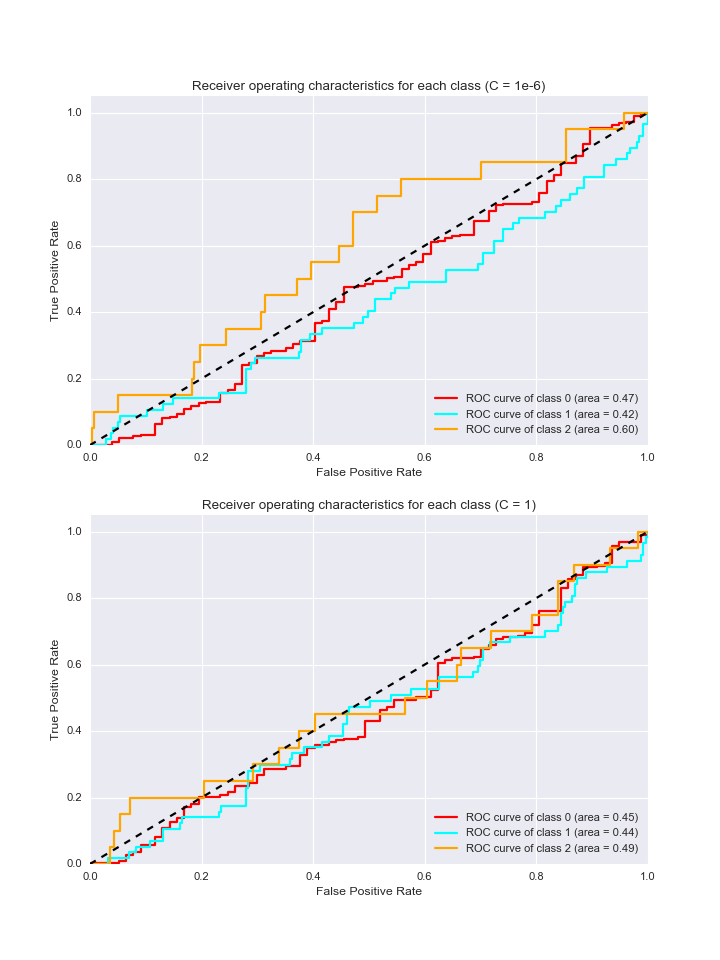

In [67]:
# Plot all ROC curves
fig, ax = plt.subplots(2,1, figsize=(9,12))
lw = 2

plt.axes(ax[0])
colors = cycle(['red', 'aqua', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for each class (C = 1e-6)')
plt.legend(loc="lower right")
plt.show()

plt.axes(ax[1])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_2[i], tpr_2[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_2[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for each class (C = 1)')
plt.legend(loc="lower right")
plt.show()

In [59]:
print(classifier.coef_)
print(classifier_2.coef_)

[[ 0.06559784 -0.0220277   0.01064438  0.25161249]
 [-0.06428261  0.01649687 -0.06537455 -0.09860795]
 [-0.03748143  0.02869789  0.17483868 -0.63436774]]
[[ 0.06184224 -0.02214552  0.01003892  0.21860602]
 [-0.06692224  0.01648371 -0.06576168 -0.09204197]
 [-0.12362883  0.02723193  0.14078955 -0.57648331]]


In [68]:
probs_1 = classifier.predict_proba(X_test)
probs_2 = classifier_2.predict_proba(X_test)

In [69]:
print(probs_1[:20])
print(probs_2[:20])

[[ 0.5074342   0.49056212  0.48448084]
 [ 0.50702556  0.49114552  0.48549527]
 [ 0.50955625  0.48791219  0.48015702]
 [ 0.5076599   0.49029419  0.48406074]
 [ 0.50918467  0.48841082  0.4810132 ]
 [ 0.50924746  0.48824687  0.48065008]
 [ 0.50865036  0.48907826  0.48210416]
 [ 0.50846799  0.48931178  0.48248506]
 [ 0.50910948  0.4884789   0.48110122]
 [ 0.50920248  0.48834058  0.48085226]
 [ 0.50765435  0.49032911  0.48415373]
 [ 0.50854608  0.48918964  0.48226417]
 [ 0.50952687  0.4879774   0.48030484]
 [ 0.50749816  0.49056046  0.48455886]
 [ 0.50881503  0.48885996  0.48172713]
 [ 0.50824152  0.48954664  0.48282905]
 [ 0.50989552  0.48748118  0.47945221]
 [ 0.50856977  0.48911026  0.48208126]
 [ 0.5092608   0.48823695  0.48064735]
 [ 0.51011681  0.48720318  0.4790001 ]]
[[ 0.66730586  0.25748294  0.08299209]
 [ 0.71641702  0.25765118  0.04182948]
 [ 0.73657204  0.22054362  0.03381485]
 [ 0.70044367  0.23702521  0.06395108]
 [ 0.73648109  0.20727628  0.04606028]
 [ 0.69230665  0.2448559

In [65]:
preds_1 = classifier.predict(X_test)
preds_2 = classifier_2.predict(X_test)
print(preds_1)
print(preds_2)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 

<IPython.core.display.Javascript object>


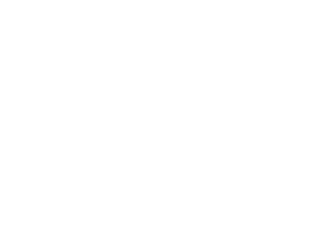

<IPython.core.display.Javascript object>


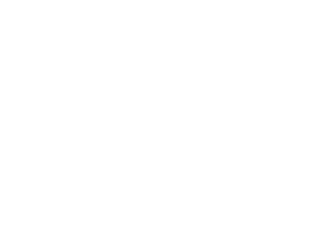

In [11]:
h = .02

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_sc[:,0].min() - .5, X_sc[:,0].max() + .5
y_min, y_max = X_sc[:,1].min() - .5, X_sc[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zero_param = np.zeros(xx.shape)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel(), zero_param.ravel(), zero_param.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
#plt.pcolormesh(xx, yy, Z)



Let's try to visualize the data pair by pair to see if any relations jump out

<IPython.core.display.Javascript object>


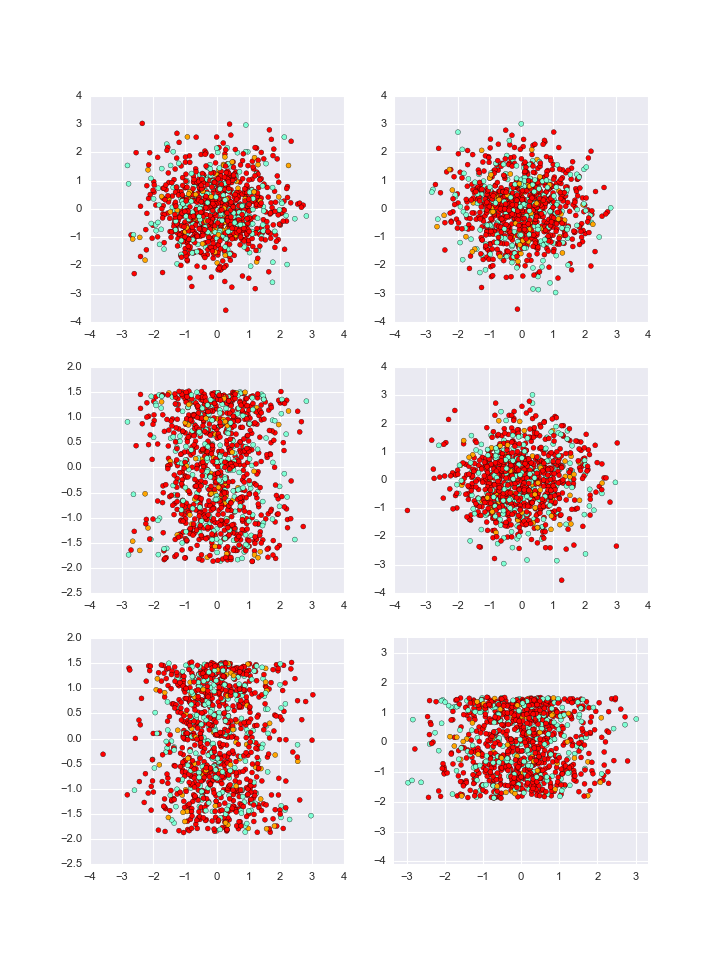

In [12]:
## create one big figure behind subpanels
fig, axes = plt.subplots(3,2,figsize=(9,12), facecolor='w')
pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]


## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for ax, pair in zip(axes.reshape(-1),pairs):
    
    # Plot also the training points
    ax.scatter(X_sc[:, pair[0]], X_sc[:, pair[1]], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    #plt.xlabel('Sepal length')
    #plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

Something weird clearly going on with variable 4 - otherwise, hard to really see too much.

Let's investigate further.

In [25]:
len(pairs)

6

[0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 9,
 9,
 9]

In [33]:
[val for val in pairs for __ in range(3)]


[[0, 1],
 [0, 1],
 [0, 1],
 [0, 2],
 [0, 2],
 [0, 2],
 [0, 3],
 [0, 3],
 [0, 3],
 [1, 2],
 [1, 2],
 [1, 2],
 [1, 3],
 [1, 3],
 [1, 3],
 [2, 3],
 [2, 3],
 [2, 3]]

<IPython.core.display.Javascript object>


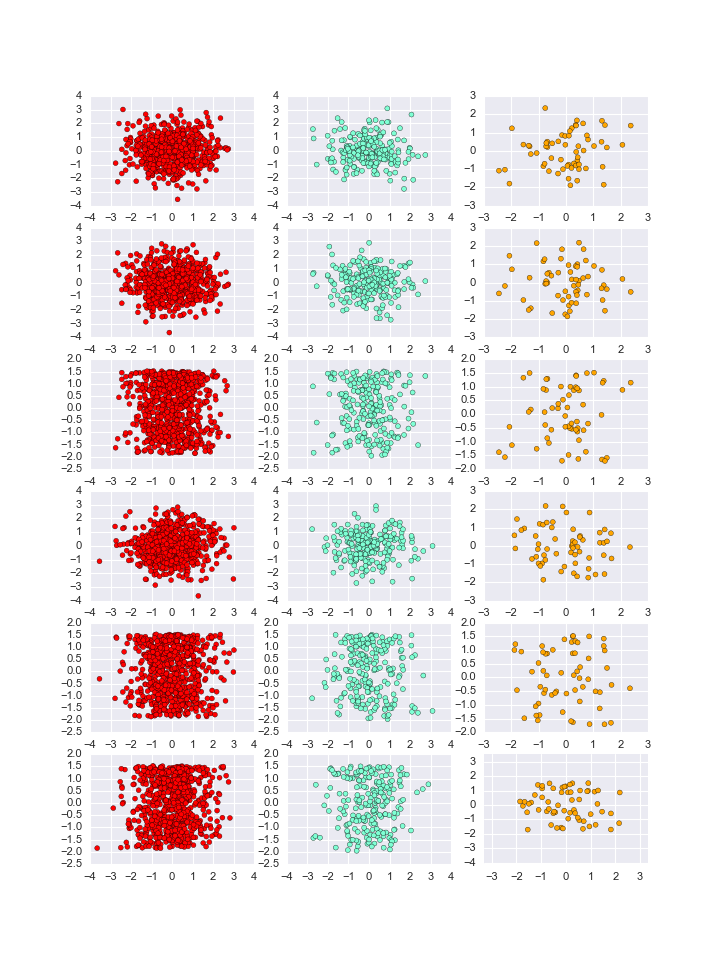

In [35]:
fig, axes = plt.subplots(6,3,figsize=(9,12), facecolor='w')

## create one big figure behind subpanels
pairs_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
pairs = [val for val in pairs_list for __ in range(3)]

df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']

dflist = [df_red, df_aqua, df_umber]
dfindices = [0,1,2]*6

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for ax, pair, index in zip(axes.reshape(-1),pairs,dfindices):

    ## scale data
    X_color = dflist[index][['Feat 1','Feat 2','Feat 3','Feat 4']]
    standard_scaler = preprocessing.StandardScaler()
    X_color_sc = standard_scaler.fit_transform(X_color)

    ax.scatter(X_color_sc[:, pair[0]], X_color_sc[:, pair[1]], c=dflist[index]['Label'], edgecolors='k', cmap=plt.cm.Paired)
    #plt.xlabel('Sepal length')
    #plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

Let's see if anything stands out looking at point density with jointplot, as opposed to plotting individual points.

In [24]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
print(feats)

[['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4'], ['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4'], ['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4']]


<IPython.core.display.Javascript object>


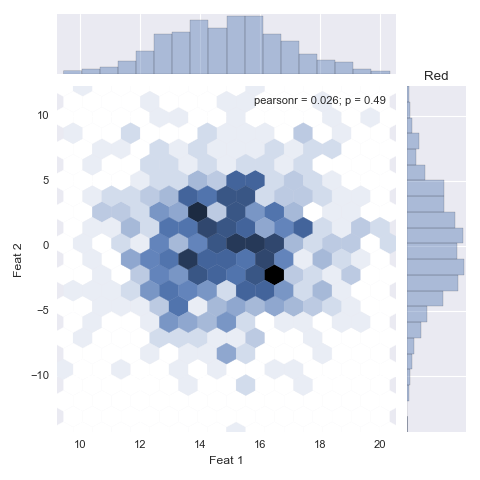

<IPython.core.display.Javascript object>


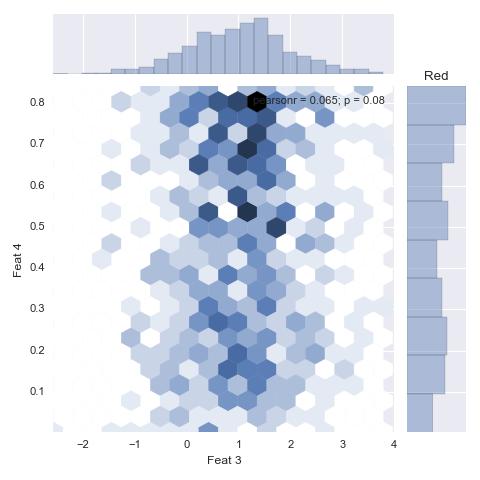

<IPython.core.display.Javascript object>


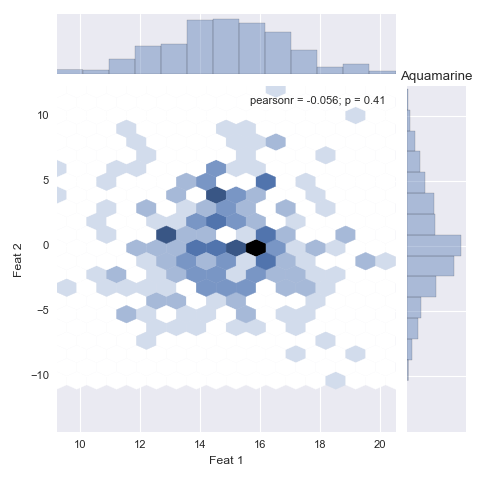

<IPython.core.display.Javascript object>


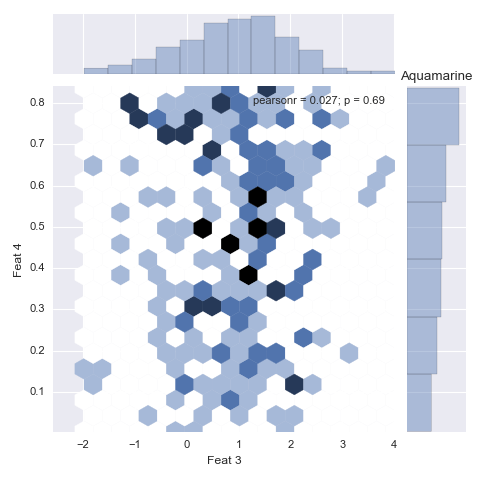

<IPython.core.display.Javascript object>


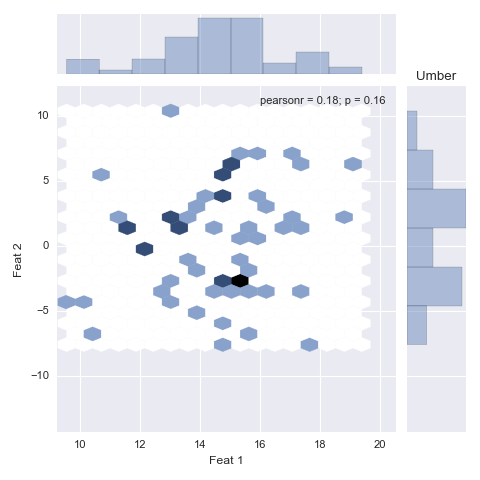

<IPython.core.display.Javascript object>


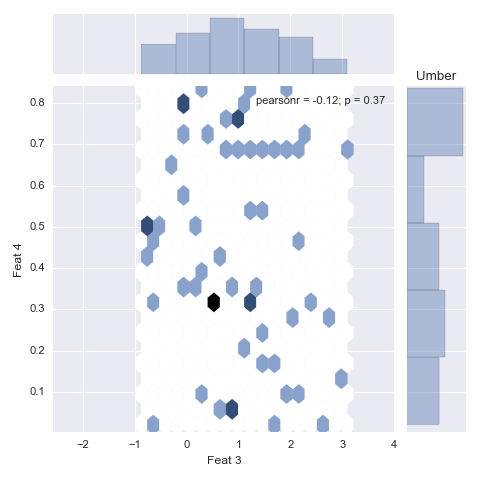

In [15]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 2'].min(),data['Feat 3'].min(),data['Feat 4'].min()]
xmax = [data['Feat 1'].max(),data['Feat 2'].max(),data['Feat 3'].max(),data['Feat 4'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

<IPython.core.display.Javascript object>


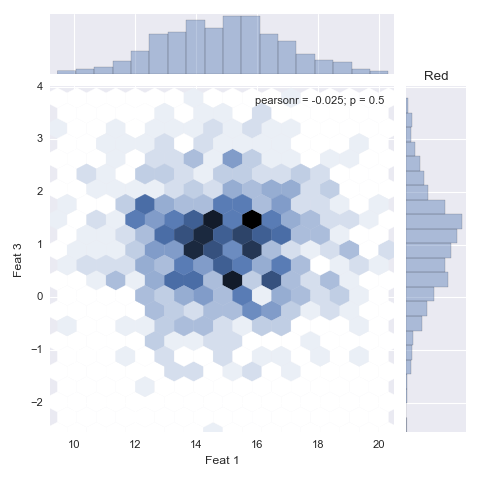

<IPython.core.display.Javascript object>


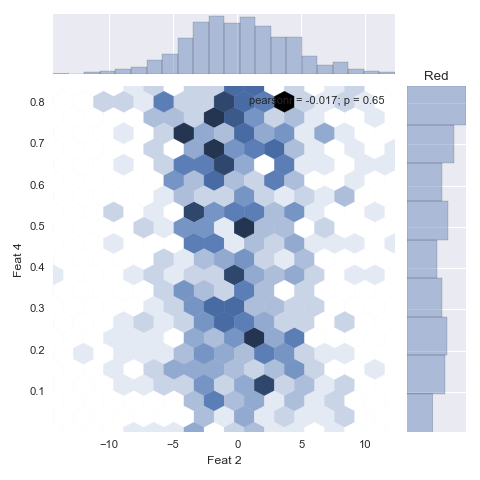

<IPython.core.display.Javascript object>


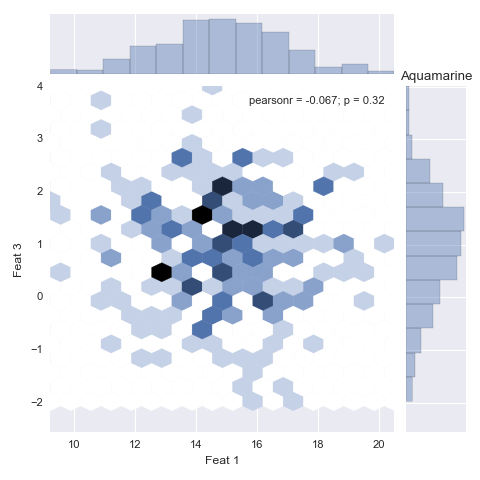

<IPython.core.display.Javascript object>


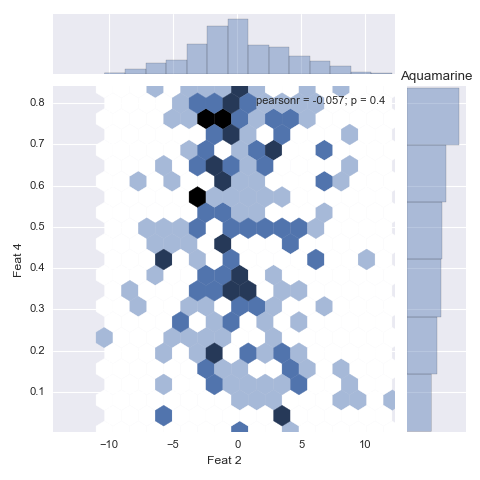

<IPython.core.display.Javascript object>


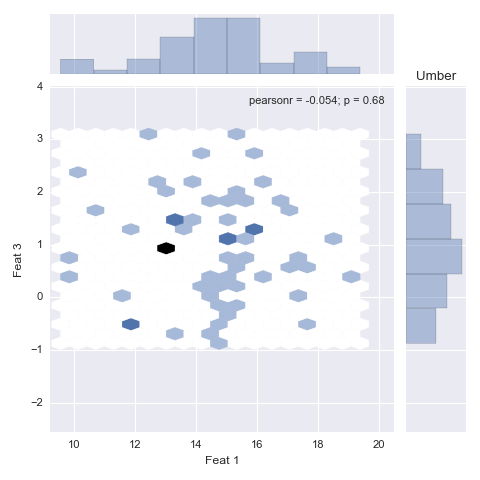

<IPython.core.display.Javascript object>


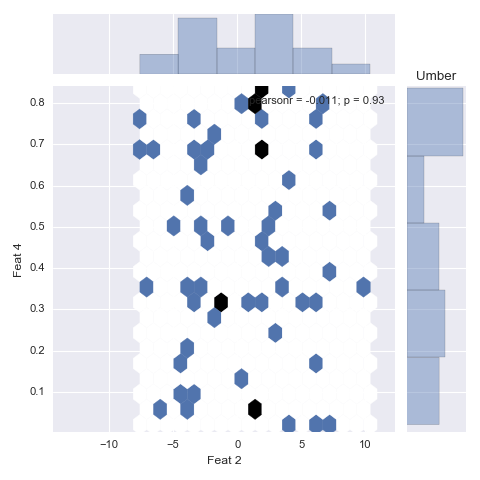

In [16]:
feats = [['Feat 1','Feat 3'],['Feat 2','Feat 4']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 3'].min(),data['Feat 2'].min(),data['Feat 4'].min()]
xmax = [data['Feat 1'].max(),data['Feat 3'].max(),data['Feat 2'].max(),data['Feat 4'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

<IPython.core.display.Javascript object>


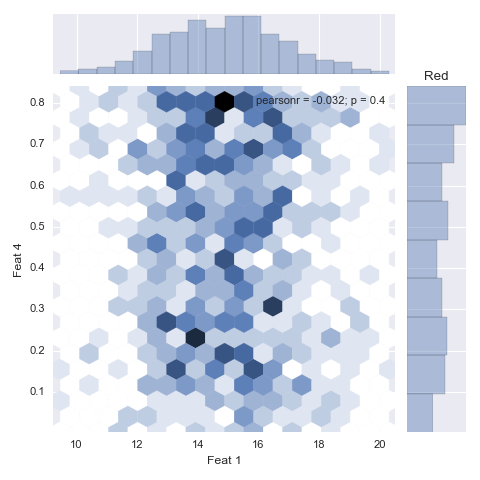

<IPython.core.display.Javascript object>


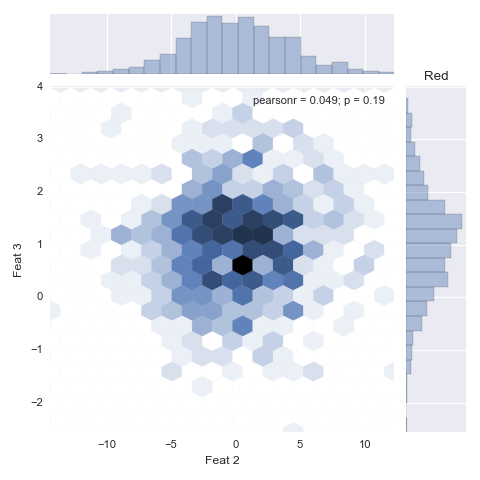

<IPython.core.display.Javascript object>


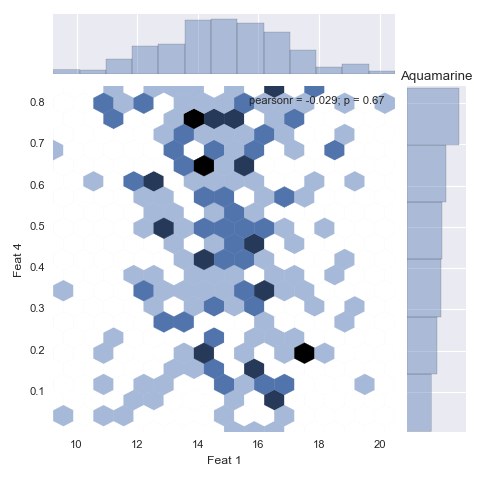

<IPython.core.display.Javascript object>


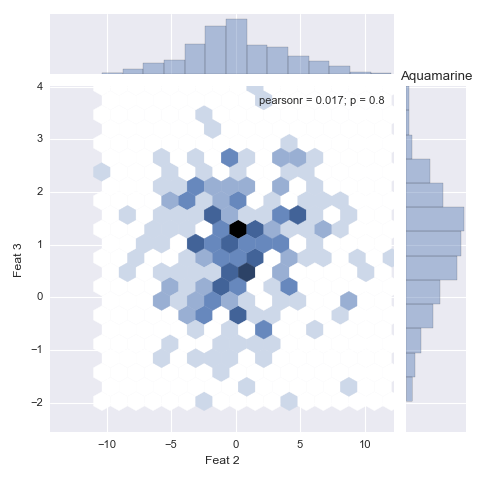

<IPython.core.display.Javascript object>


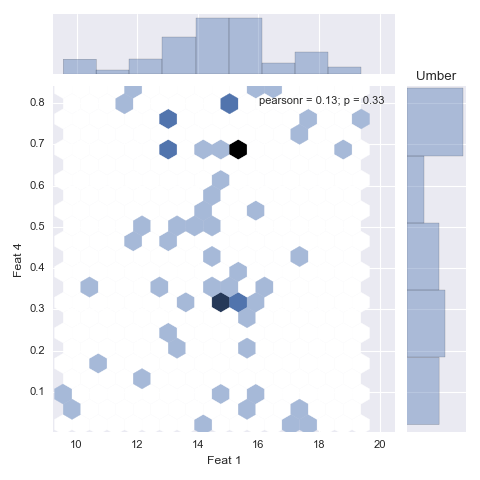

<IPython.core.display.Javascript object>


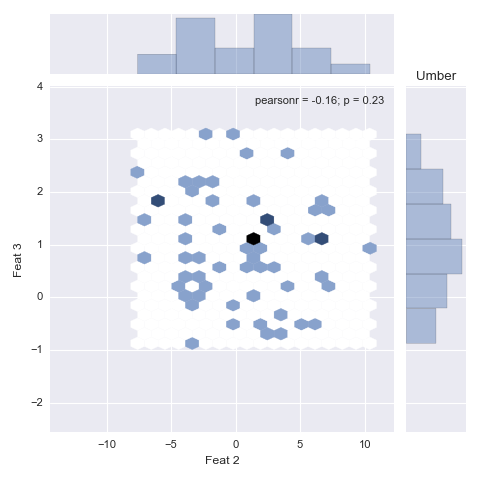

In [17]:
feats = [['Feat 1','Feat 4'],['Feat 2','Feat 3']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 4'].min(),data['Feat 2'].min(),data['Feat 3'].min()]
xmax = [data['Feat 1'].max(),data['Feat 4'].max(),data['Feat 2'].max(),data['Feat 3'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

Honestly, I really don't see much of anything in the above so far.

In [26]:
data.groupby('Label').mean()

,ID,Feat 1,Feat 2,Feat 3,Feat 4
Label,,,,,
Aquamarine,545.463636,14.855971,0.245400,0.921365,0.475640
Orange,540.466667,14.553468,0.427304,0.951305,0.452606
Red,483.430556,14.890096,0.041519,1.017993,0.463451


In [27]:
data.groupby('Label').std()

,ID,Feat 1,Feat 2,Feat 3,Feat 4
Label,,,,,
Aquamarine,284.038730,2.061649,3.830420,1.069576,0.241026
Orange,318.405402,2.055059,4.291880,0.992022,0.255030
Red,286.293556,1.974222,4.070017,0.981846,0.248816


In [28]:
data.groupby('Label').describe()

Feat 1      Feat 2      Feat 3      Feat 4           ID
Label                                                                        
Aquamarine count  220.000000  220.000000  220.000000  220.000000   220.000000
           mean    14.855971    0.245400    0.921365    0.475640   545.463636
           std      2.061649    3.830420    1.069576    0.241026   284.039861
           min      9.234888  -10.352880   -1.972700    0.004776     4.000000
           25%     13.563115   -2.144795    0.264810    0.274100   319.750000
           50%     14.889972   -0.102656    0.985837    0.492571   571.000000
           75%     16.181939    2.830191    1.664535    0.696206   774.500000
           max     20.503973   12.080668    4.012365    0.837411  1000.000000
Orange     count   60.000000   60.000000   60.000000   60.000000    60.000000
           mean    14.553468    0.427304    0.951305    0.452606   540.466667
           std      2.055059    4.291880    0.992022    0.255030   318.406864
           min      9.561882   -7.590026   -0.872921    0.021129     1.000000
           25%     13.173389   -3.099117    0.265904    0.301460   271.000000
           50%     14.809979    1.273276    0.918067    0.459028   503.500000
           75%     15.522447    3.264899    1.638239    0.687479   856.500000
           max     19.378450   10.387722    3.095657    0.835528   991.000000
Red        count  720.000000  720.000000  720.000000  720.000000   720.000000
           mean    14.890096    0.041519    1.017993    0.463451   483.430556
           std      1.974222    4.070017    0.981846    0.248816   286.294805
           min      9.460855  -14.343677   -2.563343    0.002455     2.000000
           25%     13.492842   -2.707882    0.360407    0.243421   233.750000
           50%     14.943531   -0.076003    1.052036    0.481762   477.500000
           75%     16.269048    2.801496    1.605870    0.695670   735.500000
           max     20.306380   12.311362    3.785691    0.841278   997.000000

The only thing I can see fro mthis that is plausible is a positive shift in the mean of Feature 2 for Burnt Umber, and maybe a slight decrease in Feature 4. Subtle if it exists.

Let's throw a k-nearest neighbors solution at this problem before trying random forest and logistic regression.

In [68]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.73666666666666669

In [63]:
knnfit.kneighbors[500]

AttributeError: 'Pipeline' object has no attribute 'kneighbors'

In [40]:
print(pred)

['Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red'
 'Aquamarine' 'Aquamarine' 'Red' 'Red' 'Red' 'Red' 'Orange' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red'
 'Aquamarine' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Aquamarine' 'Red' 'Aquamarine' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Aquamarine' 'Red' 'Orange' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red'
 'Aquamarine' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Aquamarine' 'Red' 'Red' 'Red' 'Red'
 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Red' 'Re

K-nearest neighbors looks like it does basically nothing!

Let's try running some of these tests on the iris sample set to make sure that we're generally doing things right.

In [82]:
iris = datasets.load_iris()
X_iris = iris.data  # we only take the first two features.
Y_iris = iris.target


In [90]:
X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = \
train_test_split(X_iris, Y_iris, test_size=0.3, random_state=0)

In [114]:
knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors = 4, weights = 'distance'))

In [115]:
knn.fit(X_iris_train,Y_iris_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance'))])

In [116]:
knn.score(X_iris_test,Y_iris_test)

0.97777777777777775

Clearly, not just a function of me not knowing how to use knn - genuinely just does not work well for this data set.

Let's try running a PCA on the data and see what turns up (and also whether any of the modes are statistically significant).

In [130]:
PCA_pipe = make_pipeline(preprocessing.StandardScaler(),PCA())

In [131]:
X_reduced = PCA_pipe.fit_transform(X)

<IPython.core.display.Javascript object>


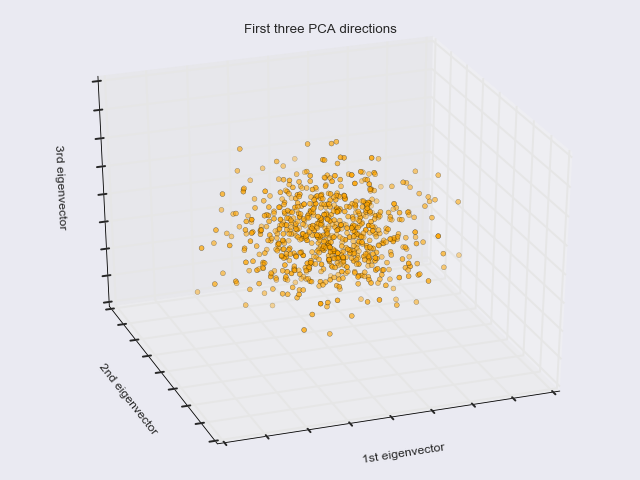

In [132]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [134]:
print(PCA_pipe.named_steps['pca'].explained_variance_ratio_)

[ 0.26728779  0.25565678  0.24497929  0.23207613]


PCA really looks random - no mode stands out for percentage of variance.

In [135]:
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']

In [136]:
print(df_red)

      ID     Feat 1     Feat 2    Feat 3    Feat 4 Label
1      2  15.023991   5.471672  0.897001  0.669878   Red
2      3  16.021447  -1.501333  1.902509  0.351208   Red
4      5  11.547150  -4.699529  0.337308  0.011619   Red
5      6  17.602117   4.357428  0.160076  0.148566   Red
7      8  12.468030  -3.472323 -0.800505  0.655059   Red
10    11  12.365146  -3.279830 -1.793218  0.411629   Red
14    15  17.382918   5.353781  0.531605  0.315832   Red
15    16  14.135683  -4.713455  0.314390  0.725500   Red
16    17  16.825351   6.289044  2.391598  0.723692   Red
17    18  14.081756   1.080921  1.225435  0.803313   Red
18    19  15.717098  -7.205339  2.278896  0.491198   Red
19    20  13.058289  -1.268736  0.272437  0.542829   Red
20    21  18.567257  -3.588392  0.390947  0.017426   Red
21    22  15.862552   0.643571 -0.595825  0.835477   Red
22    23  18.277402   0.982830  1.043001  0.587414   Red
23    24  13.141264   7.681515  2.341901  0.828890   Red
25    26  12.872443  -5.550441 

<IPython.core.display.Javascript object>


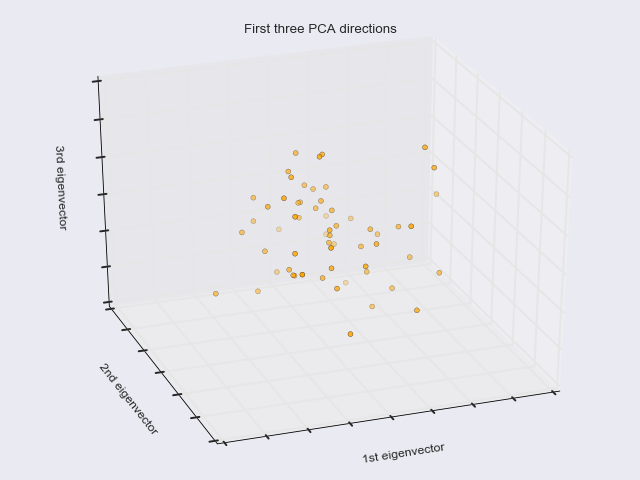

[ 0.33015923  0.25280191  0.23655137  0.18048749]


In [146]:
PCA_pipe = make_pipeline(preprocessing.StandardScaler(),PCA())
X_reduced = PCA_pipe.fit_transform(df_umber[['Feat 1','Feat 2','Feat 3','Feat 4']])

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print(PCA_pipe.named_steps['pca'].explained_variance_ratio_)

In [145]:
PCA_pipe.named_steps['pca'].components_[0]

array([ 0.54780251,  0.54607468, -0.50373843,  0.38465888])

<IPython.core.display.Javascript object>


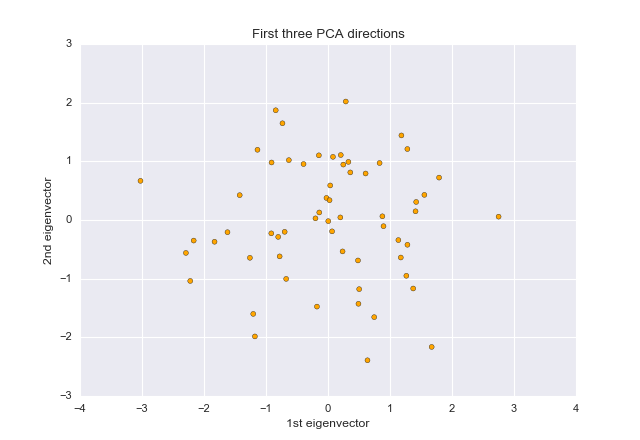

In [154]:
fig, ax = plt.subplots()
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df_umber['Label'], cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")

In [152]:
print(df_umber)

      ID     Feat 1     Feat 2    Feat 3    Feat 4   Label
0      1  10.526413   5.680796  1.661569  0.167528  Orange
12    13  15.521177  -3.839761  1.043513  0.212911  Orange
24    25  14.988085   5.711867  1.119310  0.317248  Orange
70    71  15.868335   0.504174  2.744777  0.304663  Orange
72    73  14.258059   4.101688  2.742487  0.022639  Orange
75    76  14.500162   3.896229 -0.758430  0.436132  Orange
95    96  11.845922   1.481379  1.210163  0.832411  Orange
97    98  15.405812  -1.774577  1.938020  0.291851  Orange
101  102  14.885982  -7.590026  1.516249  0.705794  Orange
124  125  15.144025  -2.503564  0.780827  0.673461  Orange
198  199  13.176664   1.328620  0.942062  0.779174  Orange
224  225  14.844917   5.027330 -0.591403  0.324589  Orange
225  226  16.198556   3.054456  1.271698  0.366041  Orange
248  249  13.284382  -4.285833  1.480349  0.186768  Orange
249  250  17.369037  -7.442471  0.810981  0.760020  Orange
277  278  15.431081  -1.065848  0.528712  0.324404  Oran

Some evidence that the Burnt Umber points feature a distinct mode of variation, but no real evidence that it is statistically significant.